In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import petl as etl
import seaborn as sns
import petlx.bio
import scipy
import numpy as np

In [2]:
hka_gambiae_bf = etl.fromtsv('tables/hka/BFcol_vs_BFgam/gambiae_hka_summary_beta.tab', delimiter='\t')
hka_gambiae_bf

chrom,gene,segreg_g,pri_der_fix_g,score_g
3L,AGAP010312,271,1,0.194208144502
3L,AGAP010313,175,3,1.7438325729
3L,AGAP010788,1144,1,0.682103622391
3L,AGAP010316,14,1,1.28908271347
3L,AGAP010781,366,1,0.0688277134038


In [3]:
hka_coluzzii_bf = etl.fromtsv('tables/hka/BFcol_vs_BFgam/coluzzii_hka_summary.tab_beta.tab', delimiter='\t')
hka_coluzzii_bf.convert('score_c', float).select(lambda rec: rec.score_c >= 1.3)

chrom,gene,segreg_c,pri_der_fix_c,score_c
3L,AGAP010742,1949,1,1.36632782999
3L,AGAP010310,118,3,2.87634006266
3L,AGAP010313,112,5,9.84956210264
3L,AGAP010317,31,4,21.4591644894
3R,AGAP010294,92,2,1.40073265877


In [4]:
hka_gambiae_coluzzii_bf = hka_coluzzii_bf.outerjoin(hka_gambiae_bf, key=['chrom', 'gene']).convert(['score_g', 'score_c'], float)

In [5]:
priv_sel_coluzzii_bf =  (hka_gambiae_coluzzii_bf.selectne('score_c', None).convert('score_g', {None: 0})
                     .select(lambda r: r.score_c >= 1.3 and r.score_g <= 1.3).sort('score_c', reverse=True)).todataframe()
priv_sel_coluzzii_bf.head()

,chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
0,X,AGAP000822,6,3,43.607842,None,None,0.000000
1,X,AGAP013181,30,5,35.361725,None,None,0.000000
2,3L,AGAP010317,31,4,21.459164,28,1,0.672572
3,X,AGAP001031,16,3,20.585733,17,1,1.083591
4,3R,AGAP010302,42,4,16.176921,51,1,0.338726


-------

In [6]:
hka_gambiae_gh = etl.fromtsv('tables/hka/GHcol_vs_GHgam/gambiae_hka_summary_beta.tab', delimiter='\t')
hka_gambiae_gh

chrom,gene,segreg_g,pri_der_fix_g,score_g
3L,AGAP010689,410,1,0.380407777062
3L,AGAP010788,477,1,0.505389288695
3L,AGAP010313,51,3,3.26222692422
3L,AGAP010780,69,1,0.00489829215737
3L,AGAP010316,4,1,1.89717023479


In [7]:
hka_coluzzii_gh = etl.fromtsv('tables/hka/GHcol_vs_GHgam/coluzzii_hka_summary.tab_beta.tab', delimiter='\t')
hka_coluzzii_gh.convert('score_c', float).select(lambda rec: rec.score_c >= 1.3)

chrom,gene,segreg_c,pri_der_fix_c,score_c
3L,AGAP010313,29,5,14.6636952331
3L,AGAP028193,1,1,3.76542401325
3L,AGAP010310,28,3,5.00758824223
3L,AGAP011979,61,4,4.2472868475
3L,AGAP010317,5,4,35.2866188905


In [8]:
hka_gambiae_coluzzii_gh = hka_coluzzii_gh.outerjoin(hka_gambiae_gh, key=['chrom', 'gene']).convert(['score_g', 'score_c'], float)

In [9]:
priv_sel_coluzzii_gh =  (hka_gambiae_coluzzii_gh.selectne('score_c', None).convert('score_g', {None: 0})
                     .select(lambda r: r.score_c >= 1.3 and r.score_g <= 1.3).sort('score_c', reverse=True)).todataframe()
priv_sel_coluzzii_gh.head()

,chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
0,3L,AGAP010317,5,4,35.286619,11,1,0.823886
1,X,AGAP013181,14,5,27.055096,None,None,0.000000
2,3R,AGAP010302,12,4,19.595073,28,1,0.293601
3,X,AGAP001031,8,3,14.812638,8,1,1.092664
4,3R,AGAP010304,18,4,14.071268,None,None,0.000000


---------------------------

In [10]:
hka_gambiae_gn = etl.fromtsv('tables/hka/GNcol_vs_GNgam/gambiae_hka_summary_beta.tab', delimiter='\t')
hka_gambiae_gn

chrom,gene,segreg_g,pri_der_fix_g,score_g
3L,AGAP010781,77,14,56.4325195809
3L,AGAP010316,2,1,2.99820056802
3L,AGAP010694,138,1,0.205899455097
3L,AGAP010750,414,1,0.399905668552
3L,AGAP010742,532,2,0.295534875771


In [11]:
hka_coluzzii_gn = etl.fromtsv('tables/hka/GNcol_vs_GNgam/coluzzii_hka_summary.tab_beta.tab', delimiter='\t')
hka_coluzzii_gn.convert('score_c', float).select(lambda rec: rec.score_c >= 1.3)

chrom,gene,segreg_c,pri_der_fix_c,score_c
3L,AGAP010310,9,3,11.6136949753
3L,AGAP010313,10,5,29.5839515161
3L,AGAP010781,78,5,4.43216792898
3L,AGAP011008,5,2,7.45550644848
3L,AGAP010317,1,4,54.9138950965


In [12]:
hka_gambiae_coluzzii_gn = hka_coluzzii_gn.outerjoin(hka_gambiae_gn, key=['chrom', 'gene']).convert(['score_g', 'score_c'], float)

In [13]:
priv_sel_coluzzii_gn =  (hka_gambiae_coluzzii_gn.selectne('score_c', None).convert('score_g', {None: 0})
                     .select(lambda r: r.score_c >= 1.3 and r.score_g <= 1.3).sort('score_c', reverse=True)).todataframe()
priv_sel_coluzzii_gn.head()

,chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
0,X,AGAP013181,1,5,75.309098,None,None,0.0
1,2R,AGAP003975,2,4,45.685883,None,None,0.0
2,X,AGAP001092,1,3,35.304380,None,None,0.0
3,X,AGAP000989,6,4,27.200620,None,None,0.0
4,2R,AGAP002872,3,3,23.488083,None,None,0.0


-----------------------

In [14]:
len(priv_sel_coluzzii_bf), len(priv_sel_coluzzii_gh), len(priv_sel_coluzzii_gn)

(44, 46, 87)

In [15]:
tbl1 = pd.merge(priv_sel_coluzzii_bf, priv_sel_coluzzii_gh, on='gene', how='inner')

In [16]:
tbl_all = pd.merge(tbl1, priv_sel_coluzzii_gn, on='gene', how='inner')
tbl_all

,chrom_x,gene,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,chrom_y,segreg_c_y,...,segreg_g_y,pri_der_fix_g_y,score_g_y,chrom,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
0,X,AGAP013181,30,5,35.361725,None,None,0.000000,X,14,...,None,None,0.000000,X,1,5,75.309098,None,None,0.000000
1,X,AGAP000833,81,5,13.792494,203,2,0.444163,X,54,...,110,1,0.123572,X,16,5,20.845138,59,2,0.981831
2,3R,AGAP010304,56,4,12.244166,None,None,0.000000,3R,18,...,None,None,0.000000,3R,27,2,1.674000,None,None,0.000000
3,X,AGAP000829,134,5,8.114213,354,1,0.085390,X,81,...,180,1,0.078494,X,28,4,8.021672,106,2,0.396075
4,X,AGAP001025,81,3,4.364933,107,1,0.072644,X,24,...,27,1,0.308820,X,8,3,12.697900,12,1,0.748514
5,2R,AGAP003997,3258,24,3.385541,3200,6,0.804488,2R,1284,...,1563,6,0.751019,2R,645,26,12.857170,1054,9,0.136197
6,X,AGAP000989,113,3,3.022910,None,None,0.000000,X,23,...,None,None,0.000000,X,6,4,27.200620,None,None,0.000000
7,3L,AGAP010310,118,3,2.876340,None,None,0.000000,3L,28,...,None,None,0.000000,3L,9,3,11.613695,None,None,0.000000
8,X,AGAP001022,212,4,2.822803,268,2,0.241714,X,61,...,80,2,0.656254,X,26,4,8.607574,47,2,1.298466
9,X,AGAP001065,60,2,2.253546,None,None,0.000000,X,20,...,None,None,0.000000,X,4,2,8.695340,None,None,0.000000


In [17]:
tbl_shared = tbl_all[['chrom_x', 'gene', 'score_c_x', 'score_c_y', 'score_c']].rename(columns={"chrom_x": "chrom", "score_c_x": 'score_bf', 'score_c_y':'score_gh','score_c': 'score_gn'})
tbl_shared

,chrom,gene,score_bf,score_gh,score_gn
0,X,AGAP013181,35.361725,27.055096,75.309098
1,X,AGAP000833,13.792494,4.859643,20.845138
2,3R,AGAP010304,12.244166,14.071268,1.674000
3,X,AGAP000829,8.114213,1.507748,8.021672
4,X,AGAP001025,4.364933,5.816012,12.697900
5,2R,AGAP003997,3.385541,3.303887,12.857170
6,X,AGAP000989,3.022910,11.335293,27.200620
7,3L,AGAP010310,2.876340,5.007588,11.613695
8,X,AGAP001022,2.822803,4.247287,8.607574
9,X,AGAP001065,2.253546,2.690201,8.695340



- AGAP000829,Calpain-15. Present in the selection atlas (https://malariagen.github.io/agam-selection-atlas/0.1-alpha3/gene/AGAP000829.html)
- AGAP000833, Myoinhibitory-like peptide
- AGAP000942, Unknown
- AGAP000989, CPAP3-A1a Toé et al. 2015 (https://core.ac.uk/download/pdf/81583908.pdf)
- AGAP001022, G protein-coupled receptor activity (GO function)
- AGAP001025, protein msta Aboagye-Antwi et al. 2015 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4400153/)
- AGAP001040, Unknown, Neafsey 2010 species specific marker
- AGAP001065, glycine hydroxymethyltransferase (function studied in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4209991/)
- AGAP003997, casein kinase 1, gamma
- AGAP010304, Unknown
- AGAP010310, Eukaryotic peptide chain release factor subunit 
- AGAP013181, carboxypeptidase A

---------------------

## Plotting genes

In [18]:
tbl_genes  = (etl
    .fromgff3('data/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.sorted.gff3.gz')
    .unpackdict('attributes')
    .cut(2,3,4,9)
    .select(lambda rec: rec.type == 'gene')
    .rename('ID', 'gene')
)
tbl_genes.display(10)

type,start,end,gene
gene,157348,186936,AGAP004677
gene,203779,205293,AGAP004678
gene,207894,210460,AGAP004679
gene,271285,271815,AGAP004680
gene,358329,359280,AGAP004681
gene,433503,461627,AGAP004682
gene,485698,488369,AGAP004683
gene,493039,493543,AGAP004684
gene,493579,497632,AGAP004685
gene,742004,747057,AGAP004686


In [19]:
tbl_shared = etl.fromdataframe(tbl_shared)
tbl_shared

chrom,gene,score_bf,score_gh,score_gn
X,AGAP013181,35.3617250553,27.0550960852,75.3090975972
X,AGAP000833,13.792493708,4.85964279514,20.845138229
3R,AGAP010304,12.2441659849,14.0712675821,1.67399968145
X,AGAP000829,8.11421337267,1.5077482036,8.02167211534
X,AGAP001025,4.36493316707,5.81601191381,12.6979002929


In [20]:
pos_private_shared = tbl_shared.join(tbl_genes, key='gene').cut(0,1,6,7)
pos_private_shared.displayall()

chrom,gene,start,end
X,AGAP000829,15355731,15364742
X,AGAP000833,15383617,15388601
X,AGAP000942,18252084,18253792
X,AGAP000989,18943236,18946454
X,AGAP001022,19629896,19640578
X,AGAP001025,19714751,19718165
X,AGAP001040,20051826,20053170
X,AGAP001065,22324224,22330158
2R,AGAP003997,47664455,47730436
3R,AGAP010304,52951761,52996140


In [74]:
import matplotlib.patches as mpatches
gff_fn = 'data/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.sorted.gff3.gz'



def plot_gene_annotation(chrom, start, stop, title, ax=None): 
    start = start - 1000
    stop = stop + 1000
    tabix_index= "%s:%s-%s" % (chrom, start, stop)
    gff = petlx.bio.gff3.fromgff3(gff_fn, tabix_index)
    tbl_features = (gff.unpackdict('attributes', ['ID'])
                .addfield('length', lambda r: r.end - r.start)
                )
    xranges_gene = tbl_features.selecteq('type', 'gene').values(['start', 'length']).list()
    xranges_exon = tbl_features.selecteq('type', 'exon').values(['start', 'length']).list()
    xranges_CDS = tbl_features.selecteq('type', 'CDS').values(['start', 'length']).list()

    if ax is None:
        # make a new figure here
        fig, ax = plt.subplots(figsize=(10,3))
        
    bar_gene= ax.broken_barh(xranges_gene, (0.125, 0.05), facecolors='#FF3333')    
    bar_exon= ax.broken_barh(xranges_exon, (0.1, 0.1), facecolors='#FFFF00', linewidth=0.2)
    bar_CDS = ax.broken_barh(xranges_CDS, (0.1, 0.1), facecolors='#0CF91C', linewidth=0.2)
   
    ax.set_title(title)
    ax.set_ylim(0,1)
    #ax.set_xlim(start-(gene_lenght/4), stop+(gene_lenght/4))
    ax.set_xlim(start, stop)
    ax.set_yticks([])
    cds_patch = mpatches.Patch(color='#0CF91C', label='CDS')
    exon_patch = mpatches.Patch(color='#FFFF00', label='Exon')
    intr_patch = mpatches.Patch(color='#FF3333', label='Intron')
    plt.legend(handles=[cds_patch, exon_patch, intr_patch],prop={'size':12})
    

    #ax.annotate('ciao', (21344460, 0.2), xycoords='data', xytext=(0,50),
                #textcoords='offset points', rotation=90, ha='center', va='bottom', color='k', 
                            #fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05
                                                        #))
    sns.set(style ='ticks',font_scale=2)
    sns.despine(left=True)



In [75]:
title = pos_private_shared['gene']

In [76]:
chrom = pos_private_shared['chrom']

In [77]:
start = pos_private_shared['start']
end = pos_private_shared['end']

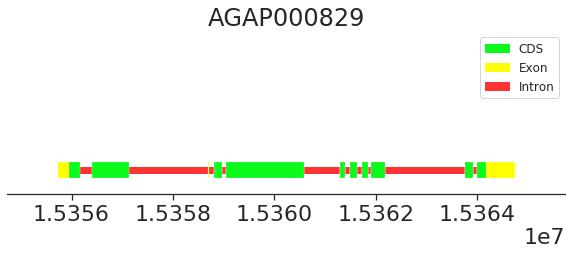

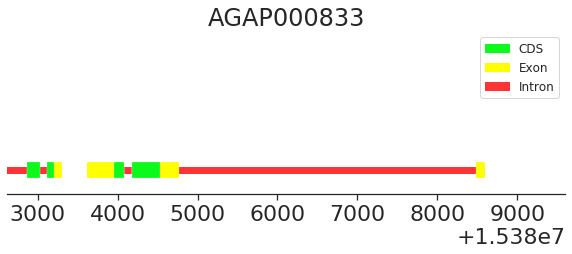

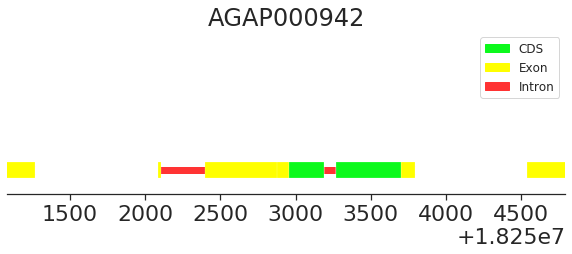

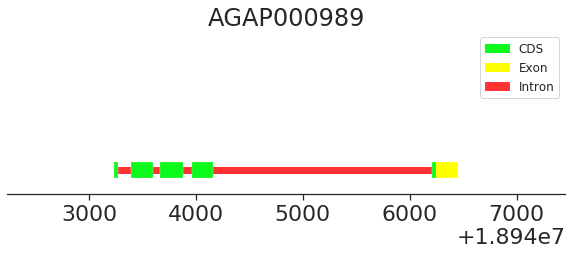

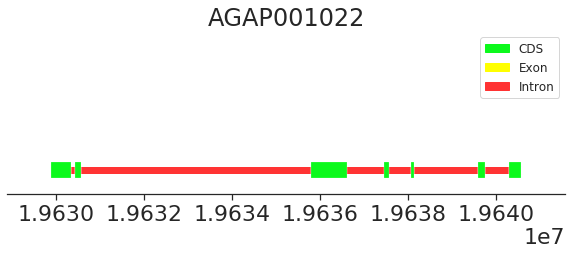

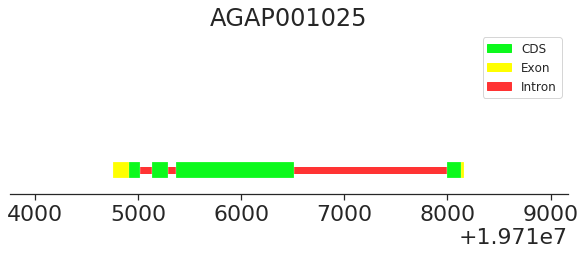

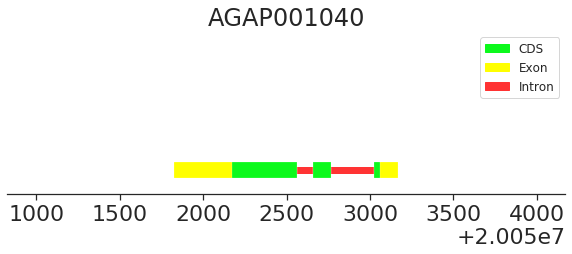

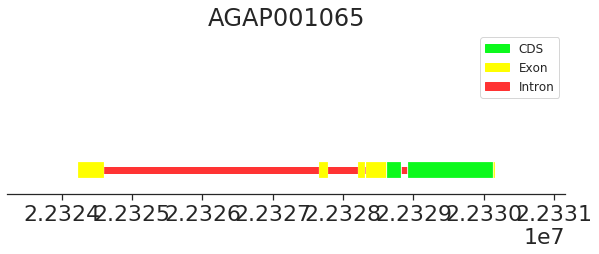

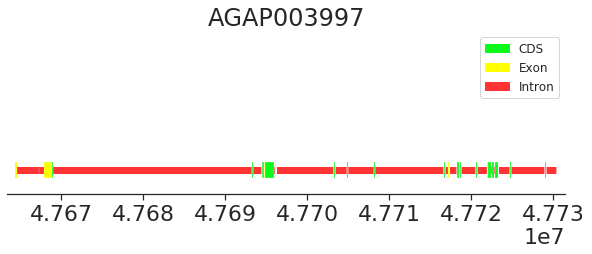

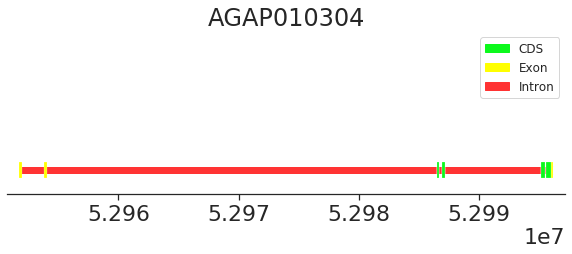

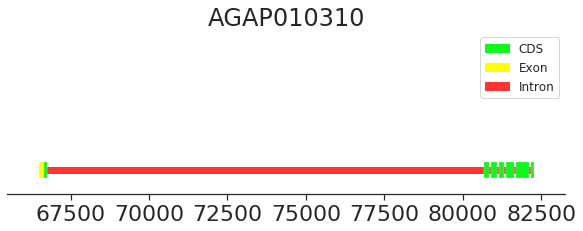

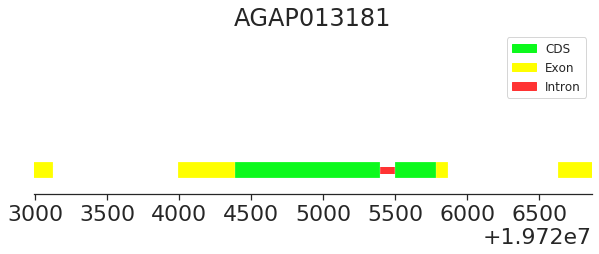

In [78]:
for i in range(len(chrom)):
    plot_gene_annotation(chrom[i], start[i], end[i], title[i])

--------------------------------

In [61]:
contigs = ['3R','3L','2R','2L','X']

In [62]:
def center_pos(r):
    start = r.start
    end = r.end
    center = ((end - start) / 2) + start
    return int(center)

In [90]:
pos_private_col = tbl_shared.join(tbl_genes, key='gene').addfield('center_gene', center_pos)
pos_private_col

chrom,gene,score_bf,score_gh,score_gn,type,start,end,center_gene
X,AGAP000829,8.11421337267,1.5077482036,8.02167211534,gene,15355731,15364742,15360236
X,AGAP000833,13.792493708,4.85964279514,20.845138229,gene,15383617,15388601,15386109
X,AGAP000942,1.74315046489,2.44966340292,3.983877382,gene,18252084,18253792,18252938
X,AGAP000989,3.02290998504,11.3352927191,27.2006201187,gene,18943236,18946454,18944845
X,AGAP001022,2.82280344576,4.2472868475,8.60757418703,gene,19629896,19640578,19635237


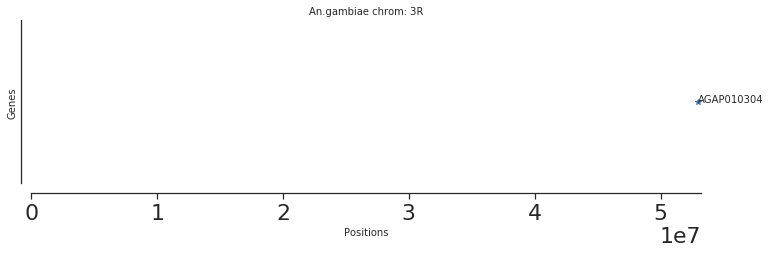

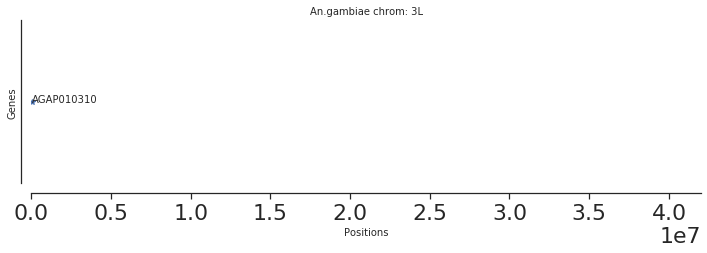

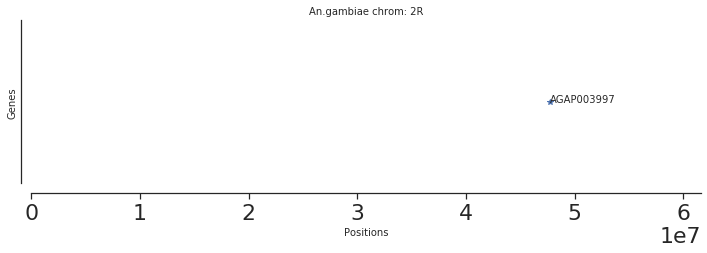

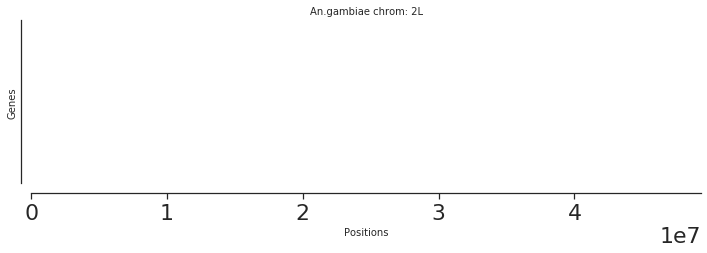

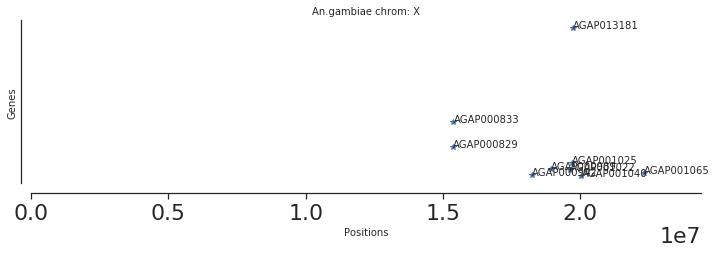

In [101]:
for chrom in contigs:
    tbl_plot = pos_private_col.select(lambda r: r.chrom == chrom)
    y = tbl_plot['score_bf']
    n = tbl_plot['gene'].list()
    fig, ax = plt.subplots(figsize=(12,3))
    x = tbl_plot['center_gene'].list()
    ax.set_ylabel('Genes', fontsize=10)
    ax.set_xlabel('Positions', fontsize=10)
    ax.set_title('An.gambiae chrom: %s' % chrom, fontsize=10)
    ax.plot(x, y, '*')
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), size=10)
    ax.set_yticks([])
    len_chrom = {'X': 244e5, '3R': 532e5, '3L': 42e6, '2R': 616e5, '2L':493e5}
    ax.set_xlim(0, len_chrom[chrom])
    sns.despine(offset=10)
    #plt.savefig('data/coluzzi_private_sel_%s.png' % chrom, dpi=500)

------------